In [279]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics 
from sklearn.model_selection import train_test_split

In [280]:
df = pd.read_csv('Property_with_Feature_Engineering.csv')

In [281]:
df.shape

(191393, 24)

In [282]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,area_marla,area_sqft,bedrooms,year,month,day
count,1.913930e+05,191393.000000,1.913930e+05,191393.000000,191393.000000,191393.000000,191393.000000,1.913930e+05,191393.000000,191393.000000,191393.000000,191393.000000
mean,1.573170e+07,4224.580350,1.644655e+07,30.104593,71.572992,2.865956,14.573527,3.967656e+03,3.171516,2018.935687,6.212270,13.349631
std,2.215249e+06,3719.125201,3.416412e+07,3.645941,3.080463,2.435332,443.343252,1.207006e+05,1.952403,0.245310,1.815174,8.486820
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000e+00,0.000000,2018.000000,1.000000,1.000000
25%,1.511867e+07,1057.000000,8.000000e+04,24.972287,67.152597,0.000000,4.900000,1.334030e+03,2.000000,2019.000000,6.000000,5.000000
50%,1.676385e+07,3233.000000,7.300000e+06,31.463563,73.077743,3.000000,7.600000,2.069110e+03,3.000000,2019.000000,7.000000,14.000000
75%,1.715282e+07,7182.000000,1.800000e+07,33.550869,74.228218,4.000000,12.000000,3.267010e+03,4.000000,2019.000000,7.000000,20.000000
max,1.769386e+07,14246.000000,2.000000e+09,73.184088,80.161430,403.000000,124444.000000,3.388000e+07,68.000000,2019.000000,12.000000,30.000000


In [283]:
df.sample(5)

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
188561,17439010,3951,https://www.zameen.com/Property/johar_town_pha...,Upper Portion,55000,High,Johar Town,Lahore,Punjab,"Johar Town, Lahore, Punjab",...,20.0,5445.02,For Rent,3,07-24-2019,2019,7,24,Hira Estate & Builders,Usman Malik
28479,13778609,3530,https://www.zameen.com/Property/allama_iqbal_t...,House,17500000,High,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",...,7.5,2041.88,For Sale,4,06-30-2019,2019,6,30,Confirm Deals Real Estate,Umair Iftikhar
66316,15949171,1483,https://www.zameen.com/Property/d_h_a_dha_phas...,House,60000000,Very High,DHA Defence,Karachi,Sindh,"DHA Defence, Karachi, Sindh",...,12.0,3267.01,For Sale,4,05-06-2019,2019,5,6,NaN,NaN
73850,16207081,1798,https://www.zameen.com/Property/bahria_town_se...,House,10500000,Medium,Bahria Town,Lahore,Punjab,"Bahria Town, Lahore, Punjab",...,5.0,1361.25,For Sale,3,06-30-2019,2019,6,30,Land Holders Real Estate & Builders,Rohan Nadeem
110471,16935804,8277,https://www.zameen.com/Property/defence_view_s...,Flat,8000000,High,Defence View Society,Karachi,Sindh,"Defence View Society, Karachi, Sindh",...,4.8,1306.80,For Sale,2,06-27-2019,2019,6,27,Adnan Estate,Abdul Jabbar


In [149]:
abc=df.location_id.unique();
abc.shape

(4321,)

In [150]:
#Feature Selection
df1 = df.drop(['property_id', 'location_id', 'page_url', 'area', 'area_marla', 'locality', 'agency', 'agent'], axis=1)

In [151]:
df1.shape

(191393, 16)

In [152]:
df1.columns

Index(['property_type', 'price', 'price_bin', 'location', 'city',
       'province_name', 'latitude', 'longitude', 'baths', 'area_sqft',
       'purpose', 'bedrooms', 'date_added', 'year', 'month', 'day'],
      dtype='object')

In [153]:
df1.dtypes

property_type     object
price              int64
price_bin         object
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths              int64
area_sqft        float64
purpose           object
bedrooms           int64
date_added        object
year               int64
month              int64
day                int64
dtype: object

In [154]:
#Remove the day and save it in the date_added column.
#we are working on monthly basis
df1['date_added'] = pd.to_datetime(df1['date_added'])
df1 = df1.reset_index()
df1['date_added'] = df1['date_added'].apply(lambda x: x.strftime('%Y-%m'))

In [155]:
df1['date_added'].dtypes

dtype('O')

In [156]:
df1.sample(5)

,index,property_type,price,price_bin,location,city,province_name,latitude,longitude,baths,area_sqft,purpose,bedrooms,date_added,year,month,day
66870,66870,Upper Portion,45000,High,DHA Defence,Islamabad,Islamabad Capital,33.525225,73.107147,4,5445.02,For Rent,3,2019-05,2019,5,17
115005,115005,House,37500000,Very High,Canal View,Lahore,Punjab,31.478159,74.254017,5,5445.02,For Sale,5,2019-07,2019,7,1
74934,74934,House,14500000,Medium,Scheme 33,Karachi,Sindh,24.938913,67.140593,4,1306.80,For Sale,4,2019-05,2019,5,6
148601,148601,House,12500000,Medium,PWD Housing Scheme,Islamabad,Islamabad Capital,33.570792,73.145256,0,2722.51,For Sale,5,2019-07,2019,7,9
166371,166371,House,27000000,High,Askari 13,Rawalpindi,Punjab,33.569523,73.064679,4,2722.51,For Sale,4,2019-07,2019,7,16


<AxesSubplot:>

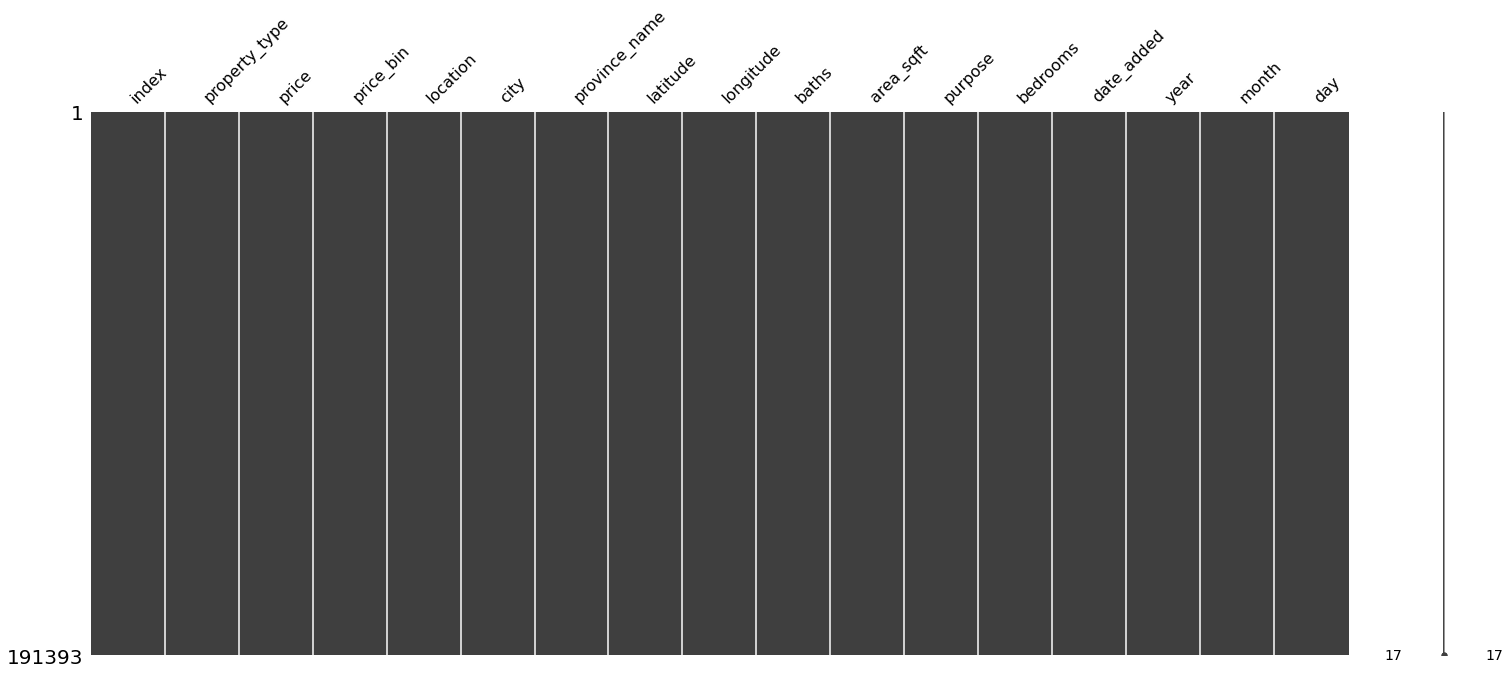

In [157]:
msno.matrix(df1)

Text(0.5, 1.0, 'Price Column')

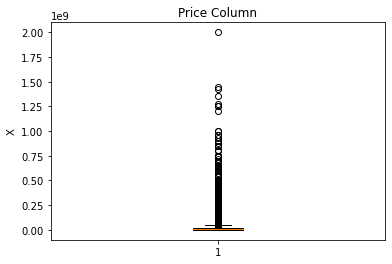

In [158]:
plt.boxplot(df1['price']);
plt.ylabel('X')
plt.title('Price Column')

Text(0.5, 1.0, 'Baths Column')

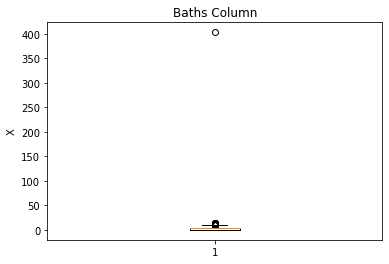

In [159]:
plt.boxplot(df1['baths']);
plt.ylabel('X')
plt.title('Baths Column')

Text(0.5, 1.0, 'area_sqft Column')

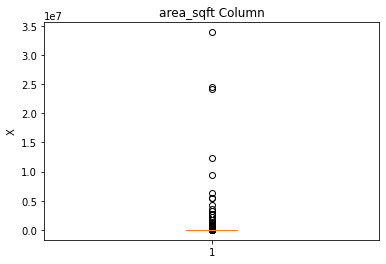

In [160]:
plt.boxplot(df1['area_sqft']);
plt.ylabel('X')
plt.title('area_sqft Column')

In [161]:
def remove_outlier(df, column_lst):
    df_in = df
    for col in column_lst:
        q1 = df_in[col].quantile(0.25)
        q3 = df_in[col].quantile(0.75)
        iqr = q3-q1
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_in = df_in.loc[(df_in[col] > fence_low) & (df_in[col] < fence_high)]
    return df_in

In [162]:
df2 = remove_outlier(df1, ['price','baths','area_sqft'])

Text(0.5, 1.0, 'Price Column')

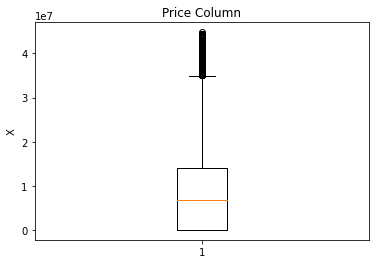

In [163]:
plt.boxplot(df2['price']);
plt.ylabel('X')
plt.title('Price Column')

Text(0.5, 1.0, 'area_sqft Column')

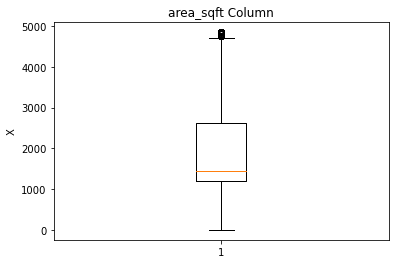

In [164]:
plt.boxplot(df2['area_sqft']);
plt.ylabel('X')
plt.title('area_sqft Column')

Text(0.5, 1.0, 'Baths Column')

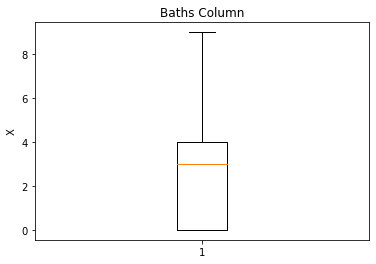

In [165]:
plt.boxplot(df2['baths']);
plt.ylabel('X')
plt.title('Baths Column')

In [166]:
df3 = df2.copy()
df3['price_per_sqft'] = df2['price']/df2['area_sqft']

Text(0.5, 1.0, 'price_per_sqft Column')

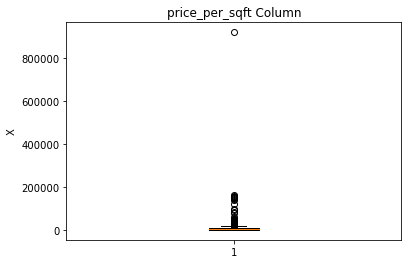

In [167]:
plt.boxplot(df3['price_per_sqft']);
plt.ylabel('X')
plt.title('price_per_sqft Column')

In [168]:
df4 = remove_outlier(df3, ['price_per_sqft'])

Text(0.5, 1.0, 'price_per_sqft Column')

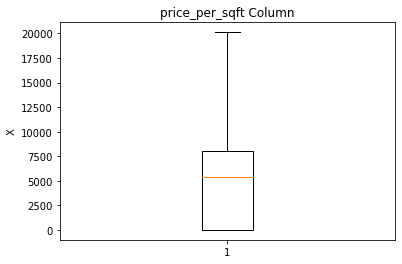

In [169]:
plt.boxplot(df4['price_per_sqft']);
plt.ylabel('X')
plt.title('price_per_sqft Column')

In [170]:
df4.shape

(148654, 18)

In [171]:
df4.head()

,index,property_type,price,price_bin,location,city,province_name,latitude,longitude,baths,area_sqft,purpose,bedrooms,date_added,year,month,day,price_per_sqft
2,2,House,9500000,Low,Eden,Lahore,Punjab,31.499348,74.416959,0,2450.26,For Sale,3,2019-07,2019,7,3,3877.139569
4,4,House,21000000,High,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,2994.76,For Sale,6,2019-04,2019,4,4,7012.248060
6,6,House,16500000,High,Military Accounts Housing Society,Lahore,Punjab,31.421229,74.285560,7,2178.01,For Sale,6,2019-07,2019,7,3,7575.722793
10,10,House,13500000,Medium,Eden,Lahore,Punjab,31.441113,74.239683,4,2041.88,For Sale,4,2019-04,2019,4,4,6611.554058
12,12,House,8500000,Low,Park View Villas,Lahore,Punjab,31.450248,74.200931,4,1361.25,For Sale,4,2019-07,2019,7,22,6244.260790


<AxesSubplot:>

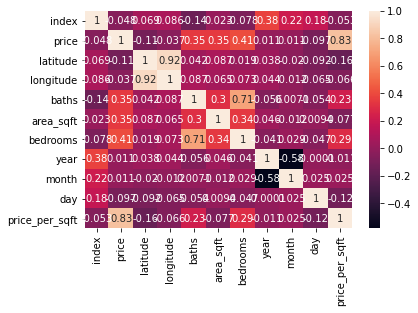

In [172]:
sns.heatmap(df4.corr(),annot=True)

In [249]:
cityList=df4.city.unique()
houseList=df4.property_type.unique()
locationList=df4.location.unique()
bedroomList=df4.bedrooms.unique()

In [250]:
df_city=pd.DataFrame(cityList,columns=['city'])
df_city.reset_index(inplace=True)
df_city.rename( columns={'index':'cityId'}, inplace=True )
df_city.head()

,cityId,city
0,0,Lahore
1,1,Karachi
2,2,Islamabad
3,3,Faisalabad
4,4,Rawalpindi


In [252]:
df5 = pd.merge(df4, df_city, how='outer', left_on='city', right_on='city')
df5.head()

,index,property_type,price,price_bin,location,city,province_name,latitude,longitude,baths,area_sqft,purpose,bedrooms,date_added,year,month,day,price_per_sqft,cityId
0,2,House,9500000,Low,Eden,Lahore,Punjab,31.499348,74.416959,0,2450.26,For Sale,3,2019-07,2019,7,3,3877.139569,0
1,4,House,21000000,High,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,2994.76,For Sale,6,2019-04,2019,4,4,7012.248060,0
2,6,House,16500000,High,Military Accounts Housing Society,Lahore,Punjab,31.421229,74.285560,7,2178.01,For Sale,6,2019-07,2019,7,3,7575.722793,0
3,10,House,13500000,Medium,Eden,Lahore,Punjab,31.441113,74.239683,4,2041.88,For Sale,4,2019-04,2019,4,4,6611.554058,0
4,12,House,8500000,Low,Park View Villas,Lahore,Punjab,31.450248,74.200931,4,1361.25,For Sale,4,2019-07,2019,7,22,6244.260790,0


In [253]:
houseList

array(['House', 'Flat', 'Lower Portion', 'Penthouse', 'Upper Portion',
       'Room', 'Farm House'], dtype=object)

In [254]:
locationList

array(['Eden', 'Allama Iqbal Town', 'Military Accounts Housing Society',
       ..., 'Shabbir Town', 'Angori Scheme 1', 'Abid Road'], dtype=object)

In [255]:
bedroomList

array([ 3,  6,  4,  0,  5,  2,  7,  1, 11,  9,  8, 10, 13, 12],
      dtype=int64)

In [256]:
df4.dtypes

index               int64
property_type      object
price               int64
price_bin          object
location           object
city               object
province_name      object
latitude          float64
longitude         float64
baths               int64
area_sqft         float64
purpose            object
bedrooms            int64
date_added         object
year                int64
month               int64
day                 int64
price_per_sqft    float64
dtype: object

In [199]:
# data_dict={cityList[c]:c for c in range(len(cityList))}
# df5['city_encode']=df5.city.map(data_dict)
# df5['price_density']=df5.price_per_sqft
# df5.sample(50)

,index,property_type,price,price_bin,location,city,province_name,latitude,longitude,baths,...,purpose,bedrooms,date_added,year,month,day,price_per_sqft,cityId,city_encode,price_density
10505,52604,House,5500000,Low,Al Rehman Garden,Lahore,Punjab,31.579852,74.476962,3,...,For Sale,3,2019-04,2019,4,4,6734.006734,0,0,6734.006734
78862,129905,Flat,5500000,Medium,North Nazimabad,Karachi,Sindh,24.948943,67.045097,2,...,For Sale,2,2019-07,2019,7,2,5050.505051,1,1,5050.505051
107413,104258,House,14000000,Medium,PWD Housing Scheme,Islamabad,Islamabad Capital,33.570792,73.145256,6,...,For Sale,5,2019-06,2019,6,27,5142.313527,2,2,5142.313527
131296,29306,Lower Portion,25000,Low,Westridge,Rawalpindi,Punjab,33.617907,73.014350,3,...,For Rent,2,2019-06,2019,6,17,15.304467,4,4,15.304467
50370,27089,Flat,11000,Low,North Nazimabad,Karachi,Sindh,24.964895,67.066877,1,...,For Rent,2,2018-12,2018,12,20,10.919957,1,1,10.919957
95361,18638,Flat,33000,Medium,I-8,Islamabad,Islamabad Capital,33.660210,73.070927,2,...,For Rent,3,2018-09,2018,9,20,21.644880,2,2,21.644880
136464,79096,Flat,4000000,Low,Bahria Town Rawalpindi,Rawalpindi,Punjab,33.485576,73.083930,0,...,For Sale,2,2019-06,2019,6,4,4739.448802,4,4,4739.448802
137818,96238,Upper Portion,34000,Medium,Media Town,Rawalpindi,Punjab,33.560887,73.125937,4,...,For Rent,3,2019-06,2019,6,21,10.407069,4,4,10.407069
139451,113007,House,29000,Low,Bahria Town Rawalpindi,Rawalpindi,Punjab,33.495991,73.100195,0,...,For Rent,0,2019-06,2019,6,28,15.217026,4,4,15.217026
31954,150678,Upper Portion,16000,Low,Ichhra,Lahore,Punjab,31.533262,74.316587,1,...,For Rent,4,2019-07,2019,7,10,5.876930,0,0,5.876930


<AxesSubplot:>

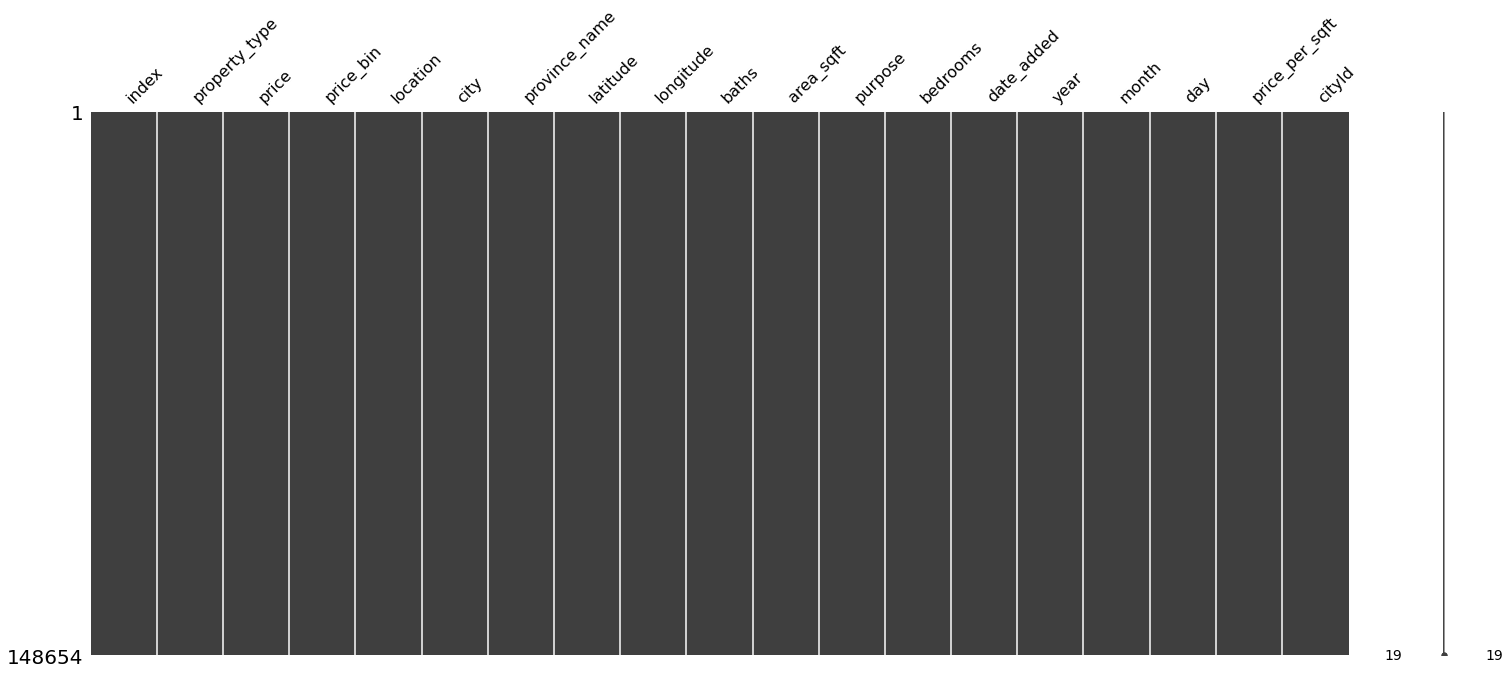

In [257]:
msno.matrix(df5)

In [269]:
X=df5.drop(['city','baths','bedrooms','year','month','day','index','price','latitude','longitude','date_added','province_name','area_sqft','purpose','property_type','price_bin','location'],axis=1)
Y=df5.price
# Z=df5.cityId

X.sample()

,price_per_sqft,cityId
71963,3902.645075,1


In [276]:
# splitting X and y into training and testing sets 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.01, random_state=1) 
print('X train samples: ', len(X_train))
print('X test samples: ', len(X_test))



# create linear regression object 
reg = linear_model.LinearRegression() 

# train the model using the training sets 
reg.fit(X_train, Y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction, coeficient of determination (R^2) 
print('Variance score: {}'.format(reg.score(X_test, Y_test,Z_test))) 
 

X train samples:  147167
X test samples:  1487
Coefficients: 
 [ 1803.0450277  77333.53271344]
Variance score: 0.7216446135880333


In [277]:
reg.intercept_

-344761.24776734225

In [278]:
reg.predict(X_test)

array([ 2.96894997e+07,  1.21502378e+07, -1.55497796e+05, ...,
        2.73273845e+07, -1.02607406e+04, -1.67413572e+05])

In [273]:
np.sum(X_test.iloc[1]*np.asarray(reg.coef_))+reg.intercept_

12150237.765001522

Text(0.5, 1.0, 'Training samples')

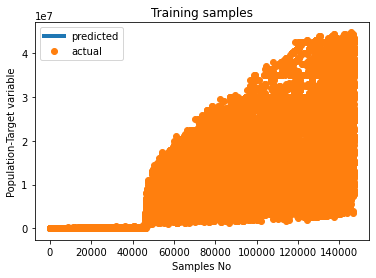

In [274]:
y_predicted=reg.predict(X_train)
y_temp=np.argsort(y_predicted)
plt.plot(np.arange(len(y_predicted)),y_predicted[y_temp],linewidth=4, label='predicted')
plt.plot(np.arange(len(y_predicted)),Y_train.iloc[y_temp], 'o',label='actual')
plt.legend()
plt.xlabel('Samples No')
plt.ylabel('Population-Target variable')
plt.title('Training samples')

Text(0.5, 1.0, 'Test samples')

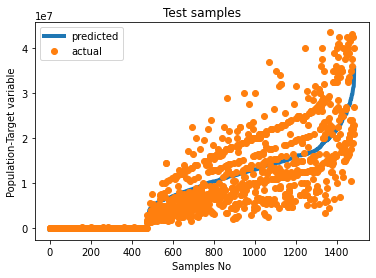

In [275]:
y_predicted=reg.predict(X_test)
y_temp=np.argsort(y_predicted)
plt.plot(np.arange(len(y_predicted)),y_predicted[y_temp], linewidth=4, label='predicted')
plt.plot(np.arange(len(y_predicted)),y_test.iloc[y_temp], 'o',label='actual')
plt.legend()
plt.xlabel('Samples No')
plt.ylabel('Population-Target variable')
plt.title('Test samples')

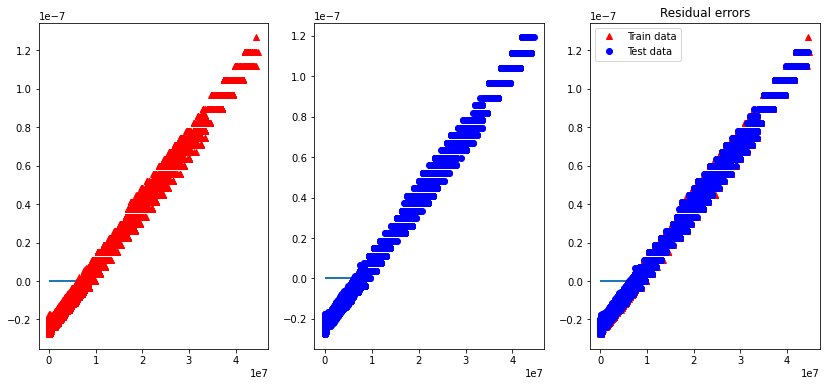

In [186]:
# plot for residual error 
plt.figure(figsize=(14,6))
## setting plot style 
# plt.style.use('fivethirtyeight')
plt.subplot(1,3,1)
  
## plotting residual errors in training data 
plt.plot(reg.predict(X_train), reg.predict(X_train) - y_train, 'r^' ,label = 'Train data') 
plt.hlines(y = 0, xmin = 0, xmax = 1e7, linewidth = 2) 

plt.subplot(1,3,2)  
## plotting residual errors in test data 
plt.plot(reg.predict(X_test), reg.predict(X_test) - y_test, 'bo' , label = 'Test data') 
plt.hlines(y = 0, xmin = 0, xmax = 1e7, linewidth = 2) 

plt.subplot(1,3,3)
plt.plot(reg.predict(X_train), reg.predict(X_train) - y_train, 'r^' ,label = 'Train data') 
plt.plot(reg.predict(X_test), reg.predict(X_test) - y_test, 'bo' , label = 'Test data') 

## plotting legend 
plt.legend(loc = 0) 
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 1e7, linewidth = 2) 
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 